In [1]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/video_data.csv")
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...


In [3]:
with open("data/IN_category_id.json", "r", encoding = "utf-8") as f:
    category_data = json.load(f)

In [4]:
category_map = {}
for item in category_data["items"]:
    category_id = int(item["id"])
    category_name = item["snippet"]["title"]
    category_map[category_id] = category_name
print(category_map)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [5]:
df["category_name"] = df["category_id"].map(category_map)

In [6]:
df["category_name"] = df["category_name"].fillna("Unknown")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [8]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
category_name               0
dtype: int64

In [9]:
def is_eng(text):
    return bool(re.match(r'^[\x00-\x7F]+$', str(text)))

df = df[df["title"].apply(is_eng)]
df["title"].head(1)

0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
Name: title, dtype: object

In [10]:
df.reset_index(drop = True, inplace = True)
df.shape

(24726, 17)

In [11]:
df["description"] = df["description"].fillna("Unknown")

In [12]:
df["category_id"] =  df["category_id"].astype("int32")

In [13]:
df.duplicated().sum()

np.int64(3060)

In [14]:
df[df.duplicated()].head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
1057,YAzs-timxnI,17.22.11,Swag Se Swagat Song | Official Teaser | Salman...,YRF,10,2017-11-20T08:40:48.000Z,"Salman Khan|""Katrina Kaif""|""Tiger Zinda Hai So...",2790320,46228,5088,3807,https://i.ytimg.com/vi/YAzs-timxnI/default.jpg,False,False,False,► Subscribe Now: https://goo.gl/xs3mrY 🔔 Stay ...,Music
1058,ZJDMWVZta3M,17.22.11,Incredibles 2 Official Teaser Trailer,Disney•Pixar,1,2017-11-18T15:43:11.000Z,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",17613871,369519,7892,45240,https://i.ytimg.com/vi/ZJDMWVZta3M/default.jpg,False,False,False,The teaser trailer for Incredibles 2 is here.\...,Film & Animation


In [15]:
df[df["title"] == "Incredibles 2 Official Teaser Trailer"].head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
618,ZJDMWVZta3M,17.19.11,Incredibles 2 Official Teaser Trailer,Disney•Pixar,1,2017-11-18T15:43:11.000Z,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",4746854,157935,2072,23205,https://i.ytimg.com/vi/ZJDMWVZta3M/default.jpg,False,False,False,The teaser trailer for Incredibles 2 is here.\...,Film & Animation
740,ZJDMWVZta3M,17.20.11,Incredibles 2 Official Teaser Trailer,Disney•Pixar,1,2017-11-18T15:43:11.000Z,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",9920833,262450,4684,35129,https://i.ytimg.com/vi/ZJDMWVZta3M/default.jpg,False,False,False,The teaser trailer for Incredibles 2 is here.\...,Film & Animation


In [16]:
df = df.drop_duplicates()
df.shape

(21666, 17)

In [17]:
df = df.drop(columns = ["video_error_or_removed"])
df.shape

(21666, 16)

##### The video_error_or_removed column contained mostly missing values and did not contribute meaningfully to engagement analysis, so it was excluded from further analysis.

# How do views and likes relate to each other?

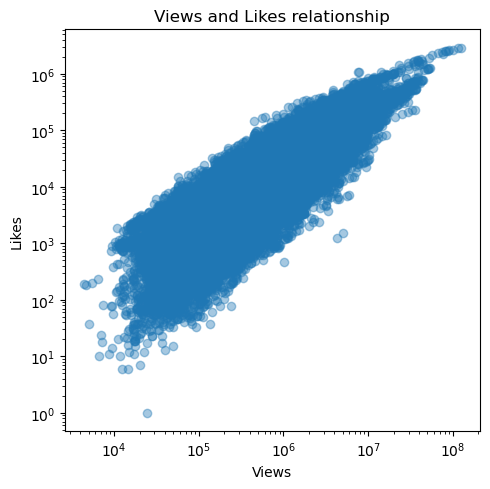

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(df["views"], df["likes"], alpha = 0.4)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("Views and Likes relationship")
plt.tight_layout()

#### Observation:
The scatter plot shows a strong positive relationship between views and likes.

### Insight:
Videos with higher views tend to receive proportionally higher likes, indicating that audience appreciation increases with reach.

#### Conclusion:
Likes scale with visibility, suggesting that higher engagement is largely driven by exposure rather than randomness.

# How do views and comments relate to each other

In [19]:
df2 = df[df["comments_disabled"] == False].copy()

##### Videos with comments disabled were retained for view–like analysis but excluded from comment-based analysis to avoid misleading engagement metrics.

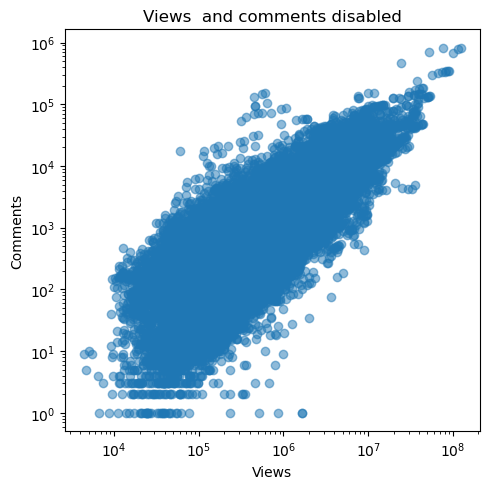

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(df2["views"], df2["comment_count"], alpha = 0.5)
plt.xlabel("Views")
plt.ylabel("Comments")
plt.xscale("log")
plt.yscale("log")
plt.title("Views  and comments disabled")
plt.tight_layout()

#### Observation:
There is a positive correlation between views and comments, though the spread is wider compared to likes.

#### Insight:
While more views generally lead to more comments, commenting behavior varies depending on content type and audience intent.

#### Conclusion:
Comments represent deeper engagement and are influenced by both visibility and the nature of the content.

# Category wise engagement

### Avg likes per view

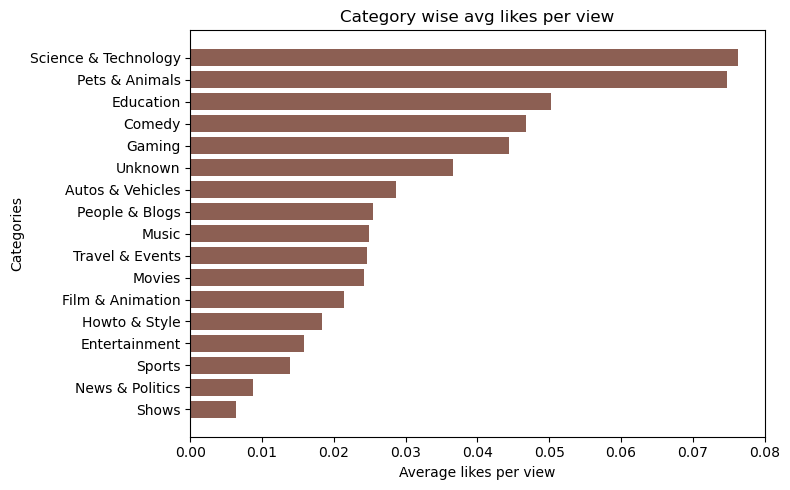

In [21]:
df_videos = df.sort_values("trending_date").drop_duplicates(subset = "video_id", keep = "last")
df_videos["likes_per_view"] = df_videos["likes"] / df_videos["views"]
likes_engagement = df_videos.groupby("category_name")["likes_per_view"].mean().sort_values()

plt.figure(figsize=(8,5))
plt.barh(likes_engagement.index, likes_engagement.values, color = "#8c5f53")
plt.ylabel("Categories")
plt.xlabel("Average likes per view")
plt.title("Category wise avg likes per view")
plt.tight_layout()
# likes_engagement

To avoid overcounting videos that appeared on the trending list multiple times, engagement was calculated at the video level by retaining the latest trending record per video. The average likes-per-view metric was then computed category-wise to compare audience engagement across content type

#### Observation:
Categories such as Science & Technology, Pets & Animals, and Education show higher average likes per view.

#### Insight:
These categories generate stronger engagement relative to their audience size, even if their total views are lower.

#### Conclusion:
High engagement does not always correspond to high popularity; niche and informational content often performs better on a per-view basis.

### Avg comments per view

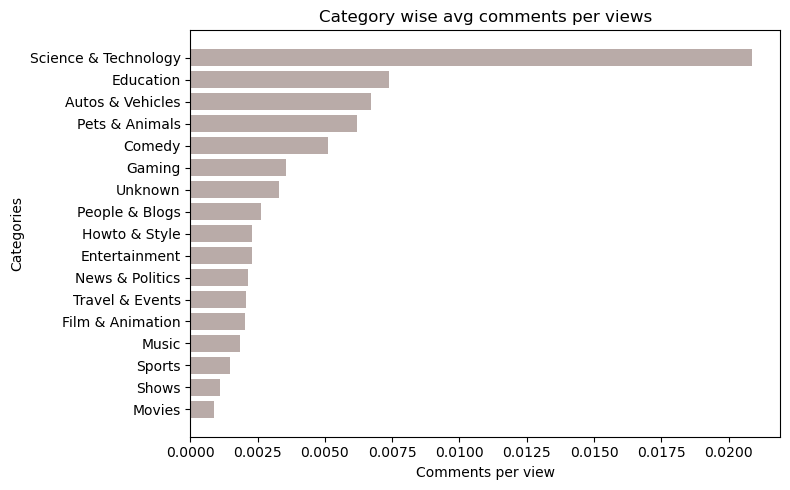

In [22]:
df2["comments_per_view"] = df2["comment_count"] / df2["views"]
comments_engagement = df2.groupby("category_name")["comments_per_view"].mean().sort_values()

plt.figure(figsize=(8,5))
plt.barh(comments_engagement.index, comments_engagement.values, color = "#b9aba8")
plt.xlabel("Comments per view")
plt.ylabel("Categories")
plt.title("Category wise avg comments per views")
plt.tight_layout()

#### Observation:
Categories like Science & Technology and Education have higher comments per view.

#### Insight:
These categories encourage discussion and active participation rather than passive consumption.

#### Conclusion:
Comment engagement is content-driven and reflects deeper viewer involvement.

### View Distribution

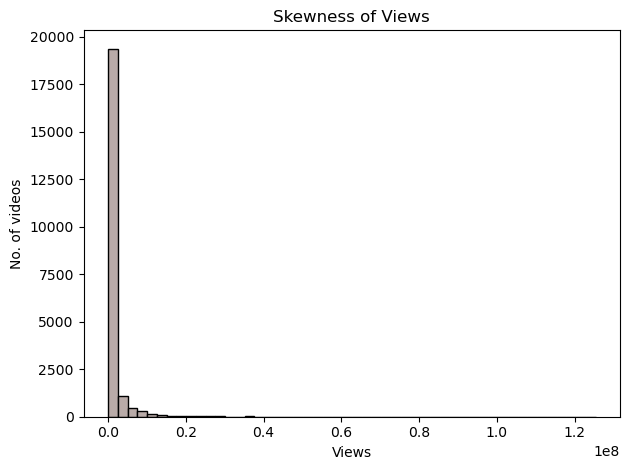

In [23]:
plt.hist(df["views"], bins = 50, edgecolor = "black", color = "#b9aba8")
plt.xlabel("Views")
plt.ylabel("No. of videos")
plt.title("Skewness of Views")
plt.tight_layout()

#### Observation:
The histogram of views is highly right-skewed, with most videos clustered at lower view counts and a long tail of highly viewed videos.

#### Insight:
A small number of viral videos dominate total views, while the majority of videos receive relatively low attention.

#### Conclusion:
Average views are misleading for this dataset; median views better represent typical video performance.

# Final Conclusion

This analysis shows that YouTube engagement follows a highly uneven distribution, where a small number of videos capture a majority of views. While views strongly correlate with likes and comments, engagement intensity varies significantly across categories. Educational and informational categories exhibit higher engagement per view, indicating deeper audience interaction, whereas entertainment content dominates in reach but not necessarily in engagement quality. These findings highlight the importance of evaluating normalized engagement metrics rather than relying solely on raw popularity measures.